In [2]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [3]:
file1 = r'C:\\Users\\user\\winequality-white1.csv'
white_wine = pd.read_csv(file1)

In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Information about the data columns
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
fig1 = go.Figure(data=[go.Pie(labels=white_wine['quality'].value_counts().index, values=white_wine['quality'].value_counts(), hole=.3)])
fig1.update_layout(legend_title_text='Quality')
fig1.show()

In [1]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig2 = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = white_wine)

NameError: name 'plt' is not defined

In [ ]:
#Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 
fig3 = plt.figure(figsize = (8,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = white_wine)


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

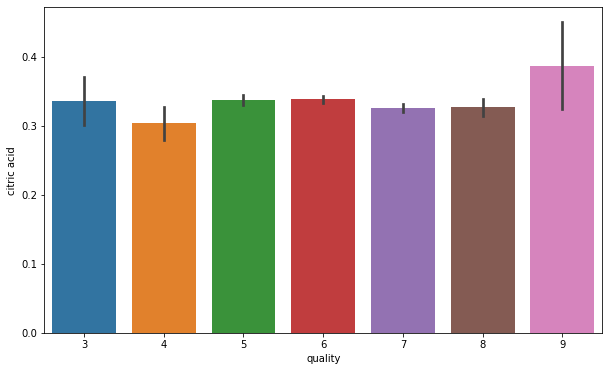

In [16]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig4 = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = white_wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

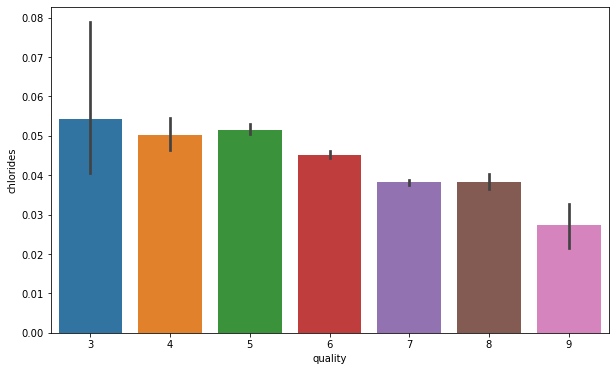

In [16]:
#Composition of chloride also go down as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = white_wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

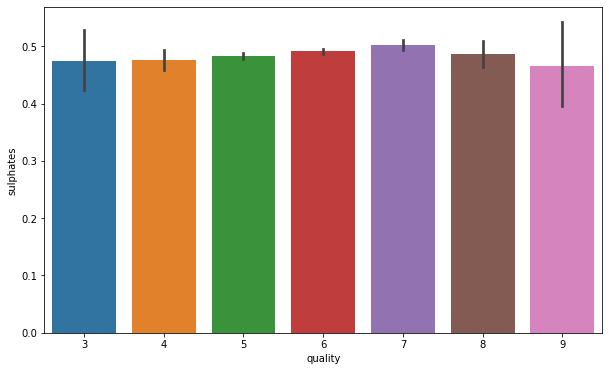

In [18]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = white_wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

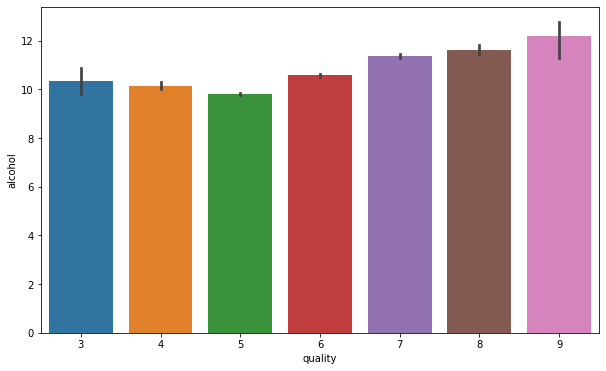

In [20]:
#Alcohol level also goes higher as te quality of wine increases
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = white_wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

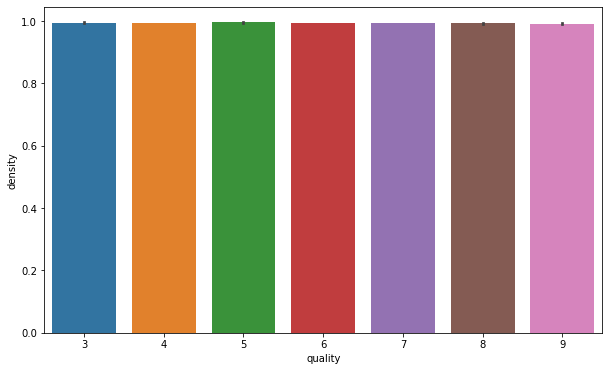

In [66]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = white_wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

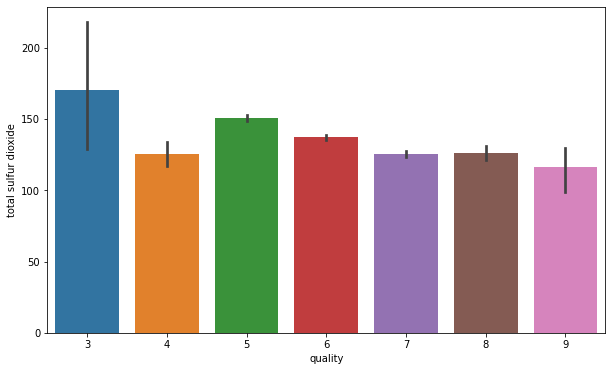

In [39]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = white_wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

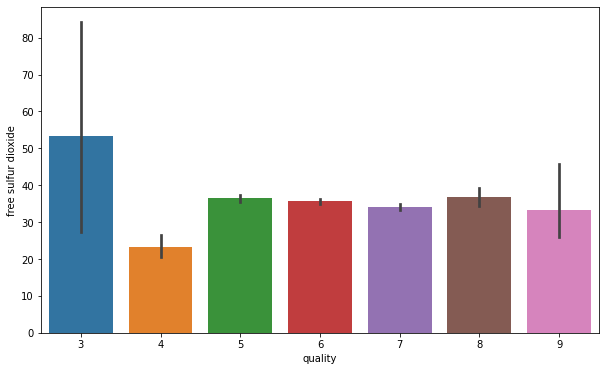

In [38]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = white_wine)

Text(0.5, 0.98, 'Visualizing continuous columns')

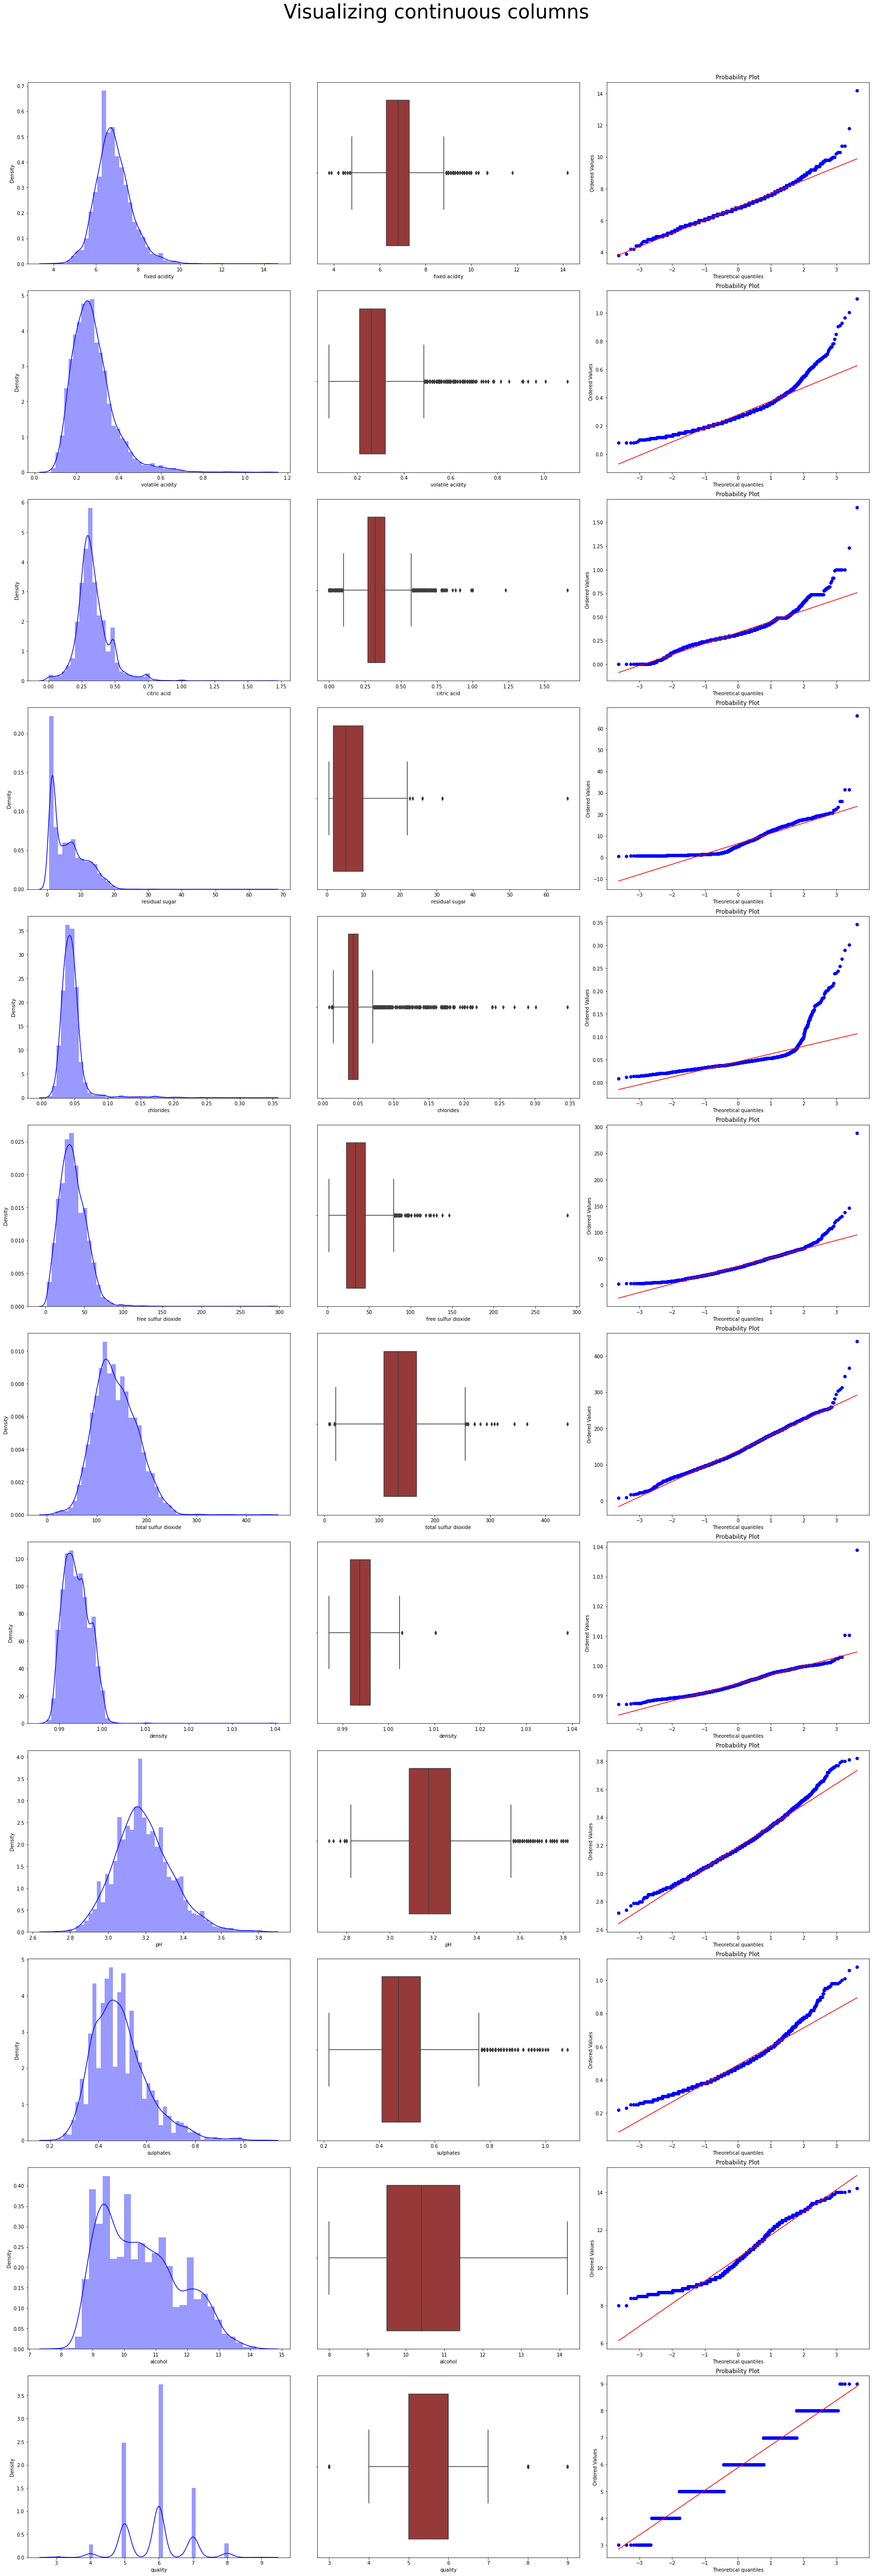

In [44]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(12,3,figsize=(25,75))
for index,i in enumerate(white_wine.columns):
    sns.distplot(white_wine[i],ax=ax[index,0],color='blue')
    sns.boxplot(white_wine[i],ax=ax[index,1],color='brown')
    stats.probplot(white_wine[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns",fontsize=40)

<AxesSubplot:>

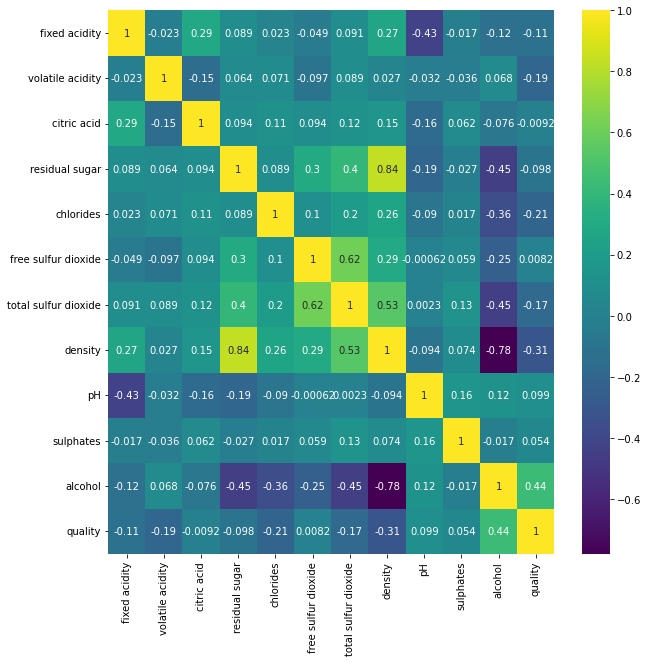

In [65]:
plt.figure(figsize = (10,10))
sns.heatmap(white_wine.corr(),annot=True, cmap= 'viridis')

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64 

Index(['quality', 'alcohol', 'pH', 'sulphates', 'free sulfur dioxide',
       'citric acid', 'residual sugar', 'fixed acidity',
       'total sulfur dioxide', 'volatile acidity'],
      dtype='object')


<AxesSubplot:>

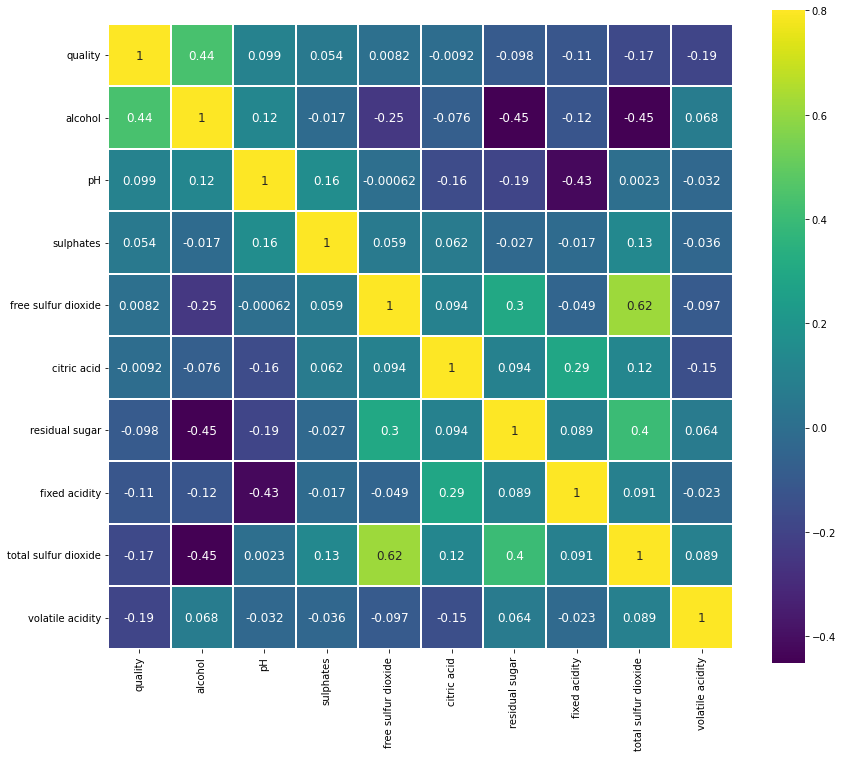

In [59]:
correlation = white_wine.corr()
print(correlation['quality'].sort_values(ascending = False),'\n')
k= 10
cols = correlation.nlargest(k,'quality')['quality'].index
print(cols)
cm = np.corrcoef(white_wine[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [67]:
white_wine.copy()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Data preprocessing


In [68]:
x = white_wine.drop("quality",axis=1)

In [69]:
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [74]:
y = white_wine["quality"].apply(lambda y_value:1 if y_value >= 6 else 0)

In [75]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64


train and test split 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [79]:
print(y.shape, y_train.shape, y_test.shape)

(4898,) (3918,) (980,)


Random model classifier 

In [80]:
model1 = RandomForestClassifier()

In [81]:
model1.fit(x_train,y_train)

RandomForestClassifier()

accuracy score

In [82]:
x_test_prediction = model1.predict(x_test)

In [83]:
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [84]:
print('accuracy:',test_data_accuracy)

accuracy: 0.826530612244898


Building a predictive system

In [85]:
input_data = [6.6,0.16,0.4,1.5,0.044,48,143,0.9912,3.54,0.52,12.4]

changing the input data to numpy array

In [86]:
input_data_as_numpy_arrary = np.asarray(input_data)

reshape the data as we are predicting the label for only one instance 

In [87]:
input_data_reshape = input_data_as_numpy_arrary.reshape(1,-1)

In [88]:
prediction = model1.predict(input_data_reshape)

In [89]:
print(prediction)

[1]


In [90]:
if prediction == 1:
    print("Fine wine")
else:
    print("Bad wine")


Fine wine


In [106]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression()]
scores = dict()

for m in models:
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.78      0.70      0.73       342
           1       0.85      0.89      0.87       638

    accuracy                           0.82       980
   macro avg       0.81      0.79      0.80       980
weighted avg       0.82      0.82      0.82       980

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.56      0.46      0.51       342
           1       0.74      0.81      0.77       638

    accuracy                           0.69       980
   macro avg       0.65      0.63      0.64       980
weighted avg       0.68      0.69      0.68       980

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

           0       0.75      0.01      0.02       342
           1       0.65      1.00      0.79       638

    accuracy                           0.